For Library Installation

In [69]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install --upgrade arabic-reshaper python-bidi pillow

Note: you may need to restart the kernel to use updated packages.


In [71]:
!pip install textblob 

In [72]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bidi.algorithm import get_display
from arabic_reshaper import reshape
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from textblob import TextBlob

In [73]:
space_df = pd.read_csv('To_space1000.csv',encoding='utf-8')

In [74]:
space_df.head()

,Unnamed: 0,Date Created,Tweets,User Account,Number of Likes,Number of Retweet,Number of Replays,Source of Tweet
0,0,2023-05-30 08:54:49+00:00,إجابات من الفضاء؛ أروت فضول طلبة #المملكة؛ قدم...,bandernawab,0,0,0,NaN
1,1,2023-05-30 08:53:02+00:00,إجابات من الفضاء؛ أروت فضول طلبة #المملكة؛ قدم...,Sharqiya_Madar,0,0,0,NaN
2,2,2023-05-30 08:52:51+00:00,#نحو_الفضاء \nضمن المشاركات المميزه لطالبات مت...,MOE_KRH_00_0105,0,0,0,NaN
3,3,2023-05-30 08:52:20+00:00,برنامج المملكة لرواد الفضاء سيسهم في تحقيق است...,MOE_RYH_06_6020,0,0,0,NaN
4,4,2023-05-30 08:50:05+00:00,أحلام وطموح تخطت حدود الأرض #نحو_الفضاء.\n#مدا...,SchoolsRiyadh,1,0,0,NaN


In [75]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dahli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dahli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
import re

def keep_arabic_english_words(text):
    # Remove emojis and special characters
#     text = re.sub(r"\s+|\\n", " ", text)  # Replace multiple whitespaces and newlines with a single space
#     text = re.sub(r"\p{So}", "", text)  # Remove emojis
#     text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove non-alphanumeric characters except spaces
    
    # Keep only Arabic and English words
    text = re.sub(r"[^\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\s]", "", text)  # Remove non-Arabic characters
    
    return text

# Assuming your DataFrame is named 'df' and the column with tweets is named 'tweets'
space_df['Tweets'] = space_df['Tweets'].apply(keep_arabic_english_words)


In [77]:
space_df['Tweets']

0       إجابات من الفضاء؛ أروت فضول طلبة المملكة؛ قدمه...
1       إجابات من الفضاء؛ أروت فضول طلبة المملكة؛ قدمه...
2       نحوالفضاء \nضمن المشاركات المميزه لطالبات متوس...
3       برنامج المملكة لرواد الفضاء سيسهم في تحقيق است...
4       أحلام وطموح تخطت حدود الأرض نحوالفضاء\nمدارسال...
                              ...                        
996                                            نحوالفضاء 
997      تجربة أنماط انتقال الحرارة في اليوم الثالث لب...
998     فيديو  المدربة موضي الشمري طلاب تعليم حفر البا...
999     بث مباشر لـ التجربة التفاعلية المشتركة بين رائ...
1000    في اليوم الثالث من التجارب العلمية \nطلاب و طا...
Name: Tweets, Length: 1001, dtype: object

In [78]:
def f(x):
    out=get_display( arabic_reshaper.reshape(x))
    return(out)

In [79]:
space_df['Tweets']= space_df['Tweets'].apply(f)

In [80]:
space_df['Tweets'].head()

0     ﺀﺎﻀﻔﻟﺍﻮﺤﻧ ﻲﻧﺮﻘﻟﺍ ﻲﻠﻋﻭ ﻱﻭﺎﻧﺮﺑ ﺔﻧﺎﻳﺭ ﺀﺎﻀﻔﻟﺍ ﺍﺪﺋ...
1     ﺀﺎﻀﻔﻟﺍﻮﺤﻧ ﻲﻧﺮﻘﻟﺍ ﻲﻠﻋﻭ ﻱﻭﺎﻧﺮﺑ ﺔﻧﺎﻳﺭ ﺀﺎﻀﻔﻟﺍ ﺍﺪﺋ...
2     ﺀﺎﻀﻔﻟﺍﻮﺤﻧ\n ﻪﻴﻌﻴﺠﺸﺗ ﻞﺋﺎﺳﺭ ﻖﻳﺮﻃ ﻦﻋ ﻢﻬﻟ ﺮﻜﺸﻟﺍ ﻢ...
3    ﺕﻻﺎﺠﻤﻟﺍ ﻰﺘﺷ ﻲﻓ ﺔﻴﻠﺒﻘﺘﺴﻣ ﺕﺎﻓﺎﺸﻜﺘﺳﺍ ﻖﻴﻘﺤﺗ ﻲﻓ ﻢﻬﺴ...
4    ﺀﺎﻀﻔﻟﺍﻮﺤﻧ ﺽﺭﻷﺍ ﺩﻭﺪﺣ ﺖﻄﺨﺗ ﺡﻮﻤﻃﻭ ﻡﻼﺣﺃ\n ﺽﺎﻳﺮﻟﺎﺳﺭﺍﺪﻣ
Name: Tweets, dtype: object

In [81]:
def preprocess_arabic_text(text):
    # Reshape and convert to Arabic presentation forms
    reshaped_text = reshape(text)
    bidi_text = get_display(reshaped_text)
    
    # Tokenize the text
    tokens = word_tokenize(bidi_text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('arabic'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    
    return filtered_tokens


In [82]:
space_df['Processed_Tweets'] = space_df['Tweets'].apply(preprocess_arabic_text)

In [83]:
all_tokens = [token for tweet_tokens in space_df['Processed_Tweets'] for token in tweet_tokens]

In [84]:
def f(x):
    out=get_display( arabic_reshaper.reshape(x))
    return(out)

In [85]:
word_freq = nltk.FreqDist(all_tokens)

In [86]:
top_words = word_freq.most_common(10)

In [87]:
words = [word for word, frequency in top_words]
frequencies = [frequency for word, frequency in top_words]

In [88]:
import os
from matplotlib import font_manager as fm, rcParams
# fpath = os.path.join(rcParams["datapath"], "C:\\Windows\\Fonts\\calibri.ttf")
# prop = fm.FontProperties(fname=fpath,size=20)

In [89]:
for word, frequency in top_words:
    print(f'{word}: {frequency}')

ﻧﺤﻮﺍﻟﻔﻀﺎﺀ: 1006
ﺍﻟﻔﻀﺎﺀ: 892
ﻓﻲ: 809
ﻣﻊ: 344
ﻣﻦ: 296
ﺍﻟﺪﻭﻟﻴﺔ: 224
ﺍﻟﻌﻠﻤﻴﺔ: 214
ﺗﺠﺮﺑﺔ: 212
ﺍﻟﺘﺠﺎﺭﺏ: 199
ﺍﻟﺴﻌﻮﺩﻳﻴﻦ: 194


In [90]:
import pandas as pd

# Sample DataFrame
data = {
    "text": [
        'السعوديين' ,'نحوالفضاء', 'الدولية', 'العلمية', 'تجربة', 'التجارب'
        # Add more Arabic words here...
    ]
}

df = pd.DataFrame(data)

In [91]:
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

# Function to reshape and align Arabic text
def reshape_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

# Apply the function to the DataFrame
df['reshaped_text'] = df['text'].apply(reshape_arabic_text)


In [92]:
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

# Function to reshape and align Arabic text
def reshape_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

# Apply the function to the DataFrame
df['reshaped_text'] = df['text'].apply(reshape_arabic_text)


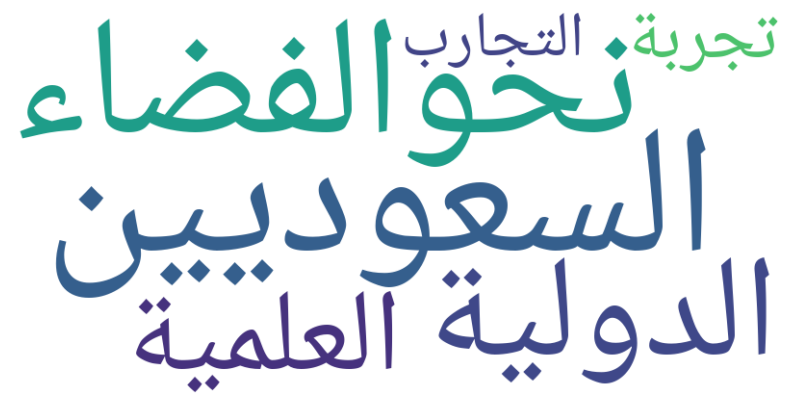

In [96]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all the reshaped text into a single string
all_text = ' '.join(df['reshaped_text'])

# Create a WordCloud object
wordcloud = WordCloud(font_path='fonts/NotoNaskhArabicUI-Regular.ttf', 
                      background_color='white', 
                      width=800, 
                      height=400, 
                      colormap='viridis').generate(all_text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()